In [1]:
%matplotlib notebook

from matplotlib.pylab import *
from numpy import *


<hr style="border-width:4px; border-color:coral"></hr>

# Homework #6


<hr style="border-width:4px; border-color:coral"></hr>



<hr style="border-width:4px; border-color:black"></hr>

## Problem #1

<hr style="border-width:4px; border-color:black"></hr>

Figure 10.1 in Trefethan and Bau illustrates a Householder reflection that reflects the vector $\mathbf x$ about the space $H$ to obtain the reflected vector $F\mathbf x$ on the x-axis.  From properties of vector addition, we might be tempted to write  $\mathbf x + \mathbf v = F\mathbf x$, where $\mathbf v$ is the vector in the space orthogonal to $H$.  However, Algorithm 10.1 defines $\mathbf v$ as $\mathbf v = F\mathbf x + \mathbf x$.  The source of the confusion may lie in the fact that a "reflection" is more naturally defined in terms of a light ray "reflecting" off of a shiny surface. 

To see that we can derive the Household reflector more naturally, consider an
*incident ray* $\mathbf v_i$ that hits a reflective surface and reflects back *reflected ray* $\mathbf v_s$.  This reflected ray satisfies the expression 

\begin{equation}
\mathbf v_s = R \mathbf v_i
\end{equation}

where $R$ is a unitary Householder projection of the form $I - 2P$ for some orthogonal projection $P$. The plot below illustates the these rays.  

#### Problem

Derive the projector $P$ needed to compute the reflector $R = I - 2P$ for incident ray $\mathbf v$.  Show that the geometry using the "reflected light" analogy is consistent with the vector addition properties we know and with Algorithm 10.1.   Provide a sample  incident ray and show that your reflection $R$ produces the expected reflected ray.  

**Hint:** For this problem, you don't need to know anything about how light reflects, but should use the fact that the angles that the incident ray and reflected ray make with the surface normal are equal.


<IPython.core.display.Javascript object>


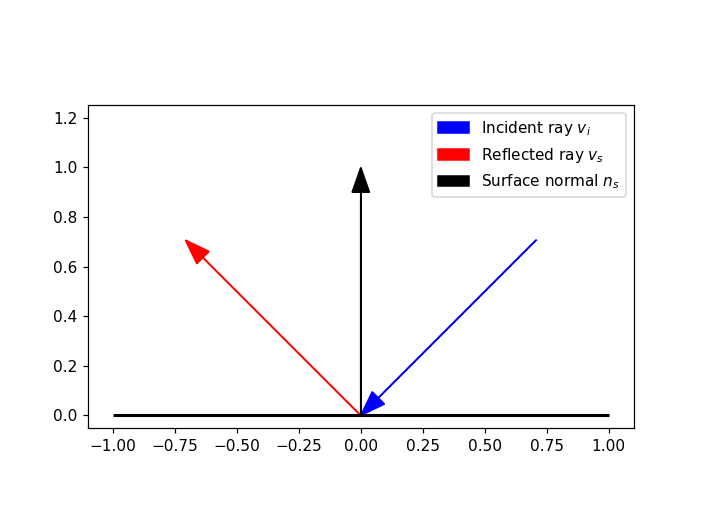

In [2]:
# Problem #1 - Incident and reflected rays
figure(1)
clf()

def plot_vec(v,color='k',scale = 1,dir=1,label=''):
    v0 = float(v[0])
    v1 = float(v[1])
    L = scale
    
    if dir == 1:
        o1,o2,e1,e2 = (0,0,v0,v1)
    else:
         o1,o2,e1,e2 = (v0,v1,-v0,-v1)
        
    arrow(o1,o2,e1,e2, 
          head_width=L*0.07, \
          head_length=L*0.1, \
          fc=color, \
          ec=color, \
          length_includes_head = True, \
          label=label)


hlines(0,xmin=-1,xmax=1,linewidth=2,color='k')

# Rays are all of unit length
a = 1/sqrt(2)
v = [a,a]
plot_vec(v,color='b',dir=0,label=r'Incident ray $v_i$')

v = [-a,a]
plot_vec(v,color='r',dir=1,label=r'Reflected ray $v_s$')

n = [0,1]
plot_vec(n,color='k',dir=1, label=r'Surface normal $n_s$')

legend()

ylim([-0.05,1.25])

gca().set_aspect('equal')


<hr style="border-width:4px; border-color:black"></hr>

## Problem #2

<hr style="border-width:4px; border-color:black"></hr>

Modify the Householder code demonstrated in class to return the matrix $Q$ as well as $R$.  You may use the code below. 

#### Problem

* Modify the code below to compute $Q$ as well as $R$. 

* Use your Householder reflections to obtain the QR decomposition for the matrix provided. 

* Show that $QR = A$. 

* Compare your $R$ and $Q$ to the decomposition returned from NumPy.  You should get the same result. 

**Note:** Do not try to use the approach described in TB.  The problem is really much easier than that approach.  Bascially, you will have to add one line in the loop below.

In [3]:
def display_mat(msg,A):
    print(msg)
    fstr = {'float' : "{:>10.4f}".format}
    with printoptions(formatter=fstr):
        display(A)
    print("")    

In [6]:
def QR_House(A):
    m,n = A.shape

    R = A.copy()
    Q = eye(m)   # Update Q
    for j in range(n):
        x = R[j:m,j:j+1]
        I = eye(m-j)    
        s = 1 if x[0] >= 0 else -1     # sign function, with sign(0)  = 1
        v = s*linalg.norm(x,2)*I[:,0:1] + x
        v = v/linalg.norm(v,2)
        P = I - 2*(v@v.T)
        R[j:m,j:n] = P@R[j:m,j:n]
        
    return Q,R

In [5]:
A = array([[1,1,2],[3,1,3],[1,1,1],[-1,0,4],[3,2,3]],dtype=float)
display_mat("A = ",A)

Q,R = QR_House(A)
q,r = qr(A,mode='complete')

display_mat("R = ",R)
display_mat("r (from NumPy) = ",r)

display_mat("Q = ",Q)
display_mat("q (from NumPy) = ",q)

display_mat("QR = ",Q@R)

A = 


array([[    1.0000,     1.0000,     2.0000],
       [    3.0000,     1.0000,     3.0000],
       [    1.0000,     1.0000,     1.0000],
       [   -1.0000,     0.0000,     4.0000],
       [    3.0000,     2.0000,     3.0000]])


R = 


array([[   -4.5826,    -2.4004,    -3.7097],
       [    0.0000,     1.1127,     2.7817],
       [    0.0000,     0.0000,     4.1833],
       [   -0.0000,     0.0000,    -0.0000],
       [    0.0000,     0.0000,     0.0000]])


r (from NumPy) = 


array([[   -4.5826,    -2.4004,    -3.7097],
       [    0.0000,     1.1127,     2.7817],
       [    0.0000,     0.0000,     4.1833],
       [    0.0000,     0.0000,     0.0000],
       [    0.0000,     0.0000,     0.0000]])


Q = 


array([[    1.0000,     0.0000,     0.0000,     0.0000,     0.0000],
       [    0.0000,     1.0000,     0.0000,     0.0000,     0.0000],
       [    0.0000,     0.0000,     1.0000,     0.0000,     0.0000],
       [    0.0000,     0.0000,     0.0000,     1.0000,     0.0000],
       [    0.0000,     0.0000,     0.0000,     0.0000,     1.0000]])


q (from NumPy) = 


array([[   -0.2182,     0.4280,     0.0000,    -0.4985,    -0.7216],
       [   -0.6547,    -0.5136,     0.4781,     0.1700,    -0.2241],
       [   -0.2182,     0.4280,    -0.2390,     0.8092,    -0.2392],
       [    0.2182,     0.4708,     0.8367,     0.0997,     0.1443],
       [   -0.6547,     0.3852,    -0.1195,    -0.2404,     0.5925]])


QR = 


array([[   -4.5826,    -2.4004,    -3.7097],
       [    0.0000,     1.1127,     2.7817],
       [    0.0000,     0.0000,     4.1833],
       [   -0.0000,     0.0000,    -0.0000],
       [    0.0000,     0.0000,     0.0000]])

<hr style="border-width:4px; border-color:black"></hr>

## Problem #3

<hr style="border-width:4px; border-color:black"></hr>

Problem 6.5 (page 47) in TB asked you to show that for a non-zero projector $P$, we have $\Vert P \Vert_2 \ge 1$, with equality if and only if $P$ is an orthogonal projector.  One solution to this problem is to use the SVD decomposition of the projector $P$. 

However, the SVD approach really doesn't provide much geometrical insight into the different between general projectors and orthogonal projectors.  For this problem, show that you can demonstrate the following using only a geometrical argument. 

* Show that for a non-zero projector, we have  $\Vert P \Vert_2 \ge 1$. 

Then show the two parts of the "if and only if". 

* $(\Longleftarrow)$ Show that if $P$ is an orthogonal projector, we have $\Vert P \Vert_2 = 1$

* $(\Longrightarrow)$Show that if $\Vert P \Vert_2 = 1$, $P$ must be orthogonal.  

To demonstrate the above geometrically, start with a decomposition of a vector $\mathbf x \in R^{m}$ into unique components in subspaces $S_1 = \mbox{range}(P)$ and $S_2 = \mbox{range}(I-P)$ given by

\begin{equation}
\mathbf x = P\mathbf x + (I-P)\mathbf x
\end{equation}

You can define angles between subspaces using this idea

\begin{equation}
(P\mathbf x)^T(I - P)\mathbf x = \Vert P\mathbf x\Vert_2 \Vert (I-P)\mathbf x\Vert_2 \cos \theta
\end{equation}

where $\theta$ is the angle between subspaces $S_1$ and $S_2$.  Then use the definition of the matrix 2-norm as

\begin{equation}
\Vert P \Vert_2 = \max_{\mathbf x} \frac{\Vert P \mathbf x \Vert_2}{\Vert \mathbf x \Vert_2}
\end{equation}

and show that the maximum will be 1 if and only if $\theta = \pi/2$. 